In [1]:
# Data explore
%matplotlib inline
import os
import pandas as pd
import numpy as np
import nilearn as nl

In [2]:
data_dir = "D:\\fmri\\ABCD\\data"

In [3]:
demographics = pd.read_csv(os.path.join(data_dir, "fmriresults01.txt"), sep='\t')
demographics_descriptions = demographics.T[0]
demographics = demographics.drop(0, axis=0).set_index("subjectkey")
labels = pd.read_csv(os.path.join(data_dir, "results", "training_fluid_intelligenceV1.csv")).set_index("subject")

In [4]:
vol_labels = pd.read_excel(os.path.join(data_dir, "ALL_measures_evan.xlsx"), header=0, skiprows=1).rename(columns={"ID": "subject"}).set_index("subject", drop=True)
vol_labels.head()

,BrStem_volume,L_Accu_volume,R_Accu_volume,L_Amyg_volume,R_Amyg_volume,L_Caud_volume,R_Caud_volume,L_Hipp_volume,R_Hipp_volume,L_Pall_volume,...,Petersen_257_intstdev,Petersen_258_intstdev,Petersen_259_intstdev,Petersen_260_intstdev,Petersen_261_intstdev,Petersen_262_intstdev,Petersen_263_intstdev,Petersen_264_intstdev,Petersen_265_intstdev,Petersen_266_intstdev
subject,,,,,,,,,,,,,,,,,,,,,
NDAR_INV007W6H7B,19976,741,579,800,721,4142,4182,4338,4074,1821,...,21.380277,26.934034,26.861066,22.122959,23.512136,24.069266,24.616167,19.692261,0,0
NDAR_INV00CY2MDM,18813,563,569,1201,973,4529,4427,4193,3777,2067,...,16.141484,21.629145,19.349219,19.452652,18.437933,14.250086,17.478680,13.203783,0,0
NDAR_INV00HEV6HB,18846,472,209,824,1618,4323,4352,3977,4044,1724,...,17.419444,18.084924,15.735113,18.085971,20.289218,11.103892,21.086193,17.840415,0,0
NDAR_INV00LJVZK2,20073,740,541,1478,1015,3630,4087,3808,3900,1825,...,14.538582,19.172260,18.528190,19.732189,16.090914,18.700417,17.439270,15.013547,0,0
NDAR_INV00NPMHND,17857,826,699,900,902,4135,4867,3596,3500,1866,...,15.376505,15.724844,16.407631,15.424087,19.531621,12.885772,14.714091,16.705930,0,0


In [6]:
sum(np.array(["_entropy" in v for v in vol_labels.columns]))

383

In [16]:
vol_labels.replace("missing", 0).iloc[0, ["_entropy" in i for i in vol_labels.columns]].values

array([0.854227, 0.872584, 0.842231, 0.883633, 0.865934, 0.92895,
       0.927418, 0.945947, 0.932275, 0.926746, 0.94002, 0.957461,
       0.955001, 0.942188, 0.919366, 0.979637, 0.979803, 0.973777,
       0.976911, 0.935392, 0.942177, 0.971921, 0.974551, 0.940486,
       0.943957, 0.945979, 0.952337, 0.956492, 0.953303, 0.95313,
       0.953632, 0.959734, 0.95645, 0.970067, 0.96861, 0.929678, 0.925533,
       0.962341, 0.964632, 0.934856, 0.936665, 0.924101, 0.927335,
       0.951031, 0.946425, 0.930925, 0.938351, 0.948774, 0.941867,
       0.879649, 0.883696, 0.962887, 0.960888, 0.963874, 0.969506,
       0.96852, 0.968744, 0.977112, 0.974408, 0.964568, 0.969661,
       0.974272, 0.97041, 0.965754, 0.968743, 0.958035, 0.96071, 0.977624,
       0.977568, 0.975397, 0.975871, 0.962306, 0.973942, 0.966478,
       0.966862, 0.969146, 0.959739, 0.967089, 0.967959, 0.948017,
       0.961003, 0.933764, 0.911582, 0.96831, 0.969071, 0.964242,
       0.956923, 0.963097, 0.964434, 0.946677, 0.94

In [7]:
vol_labels.sum(axis=0).shape

(1064,)

In [40]:
pd.MultiIndex.from_tuples([("ID", "ID")])

MultiIndex(levels=[['ID'], ['ID']],
           codes=[[0], [0]])

In [4]:
demographics.head()

,collection_id,fmriresults01_id,dataset_id,src_subject_id,origin_dataset_id,interview_date,interview_age,gender,experiment_id,inputs,...,qc_fail_quest_reason,qc_outcome,derived_files,scan_type,img03_id2,file_source2,session_det,image_history,collection_title,study_cohort_name
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INV028D3ELL,3104,139885,17597,NDAR_INV028D3ELL,12581,06/27/2017,109,F,NaN,Output of ABCD ABCD-NP-CHALLENGE,...,none,pass,s3://NDAR_Central_1/submission_17212/image03/t...,MR structural (T1),NaN,NaN,ABCD-NP-CHALLENGE-T1-brain,"noise removal, inhomogeneity correction, skull...",ABCD Neurocognitive Prediction Challenge 2019,ABCD NP Challenge 2019 Training Set
NDAR_INV03CV8RDT,3104,139891,17597,NDAR_INV03CV8RDT,12581,08/16/2017,128,M,NaN,Output of ABCD ABCD-NP-CHALLENGE,...,none,pass,s3://NDAR_Central_1/submission_17212/image03/t...,MR structural (T1),NaN,NaN,ABCD-NP-CHALLENGE-T1-brain,"noise removal, inhomogeneity correction, skull...",ABCD Neurocognitive Prediction Challenge 2019,ABCD NP Challenge 2019 Training Set
NDAR_INV03XVEBPM,3104,139893,17597,NDAR_INV03XVEBPM,12143,05/19/2017,120,F,NaN,Output of ABCD ABCD-NP-CHALLENGE,...,none,pass,s3://NDAR_Central_1/submission_17212/image03/t...,MR structural (T1),NaN,NaN,ABCD-NP-CHALLENGE-T1-brain,"noise removal, inhomogeneity correction, skull...",ABCD Neurocognitive Prediction Challenge 2019,ABCD NP Challenge 2019 Training Set
NDAR_INV07RAHHYH,3104,139899,17597,NDAR_INV07RAHHYH,12143,04/23/2017,119,F,NaN,Output of ABCD ABCD-NP-CHALLENGE,...,none,pass,s3://NDAR_Central_1/submission_17212/image03/t...,MR structural (T1),NaN,NaN,ABCD-NP-CHALLENGE-T1-brain,"noise removal, inhomogeneity correction, skull...",ABCD Neurocognitive Prediction Challenge 2019,ABCD NP Challenge 2019 Training Set
NDAR_INV08EFDKZ6,3104,139901,17597,NDAR_INV08EFDKZ6,14057,01/27/2017,131,M,NaN,Output of ABCD ABCD-NP-CHALLENGE,...,none,pass,s3://NDAR_Central_1/submission_17212/image03/t...,MR structural (T1),NaN,NaN,ABCD-NP-CHALLENGE-T1-brain,"noise removal, inhomogeneity correction, skull...",ABCD Neurocognitive Prediction Challenge 2019,ABCD NP Challenge 2019 Training Set


In [5]:
labels.head()

,residual_fluid_intelligence_score
subject,
NDAR_INV007W6H7B,3.471969
NDAR_INV00CY2MDM,-8.958806
NDAR_INV00HEV6HB,2.898313
NDAR_INV00LJVZK2,0.218017
NDAR_INV00NPMHND,-18.663981


In [8]:
labels.loc["NDAR_INV007W6H7B"]["residual_fluid_intelligence_score"]

3.4719687363630096

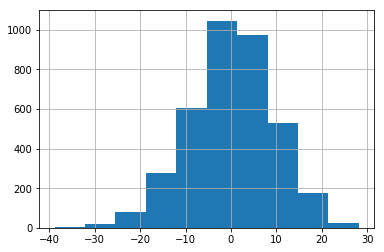

In [6]:
labels.residual_fluid_intelligence_score.hist()

In [36]:
np.random.seed(42)
random_samples = np.random.choice(3740, 500)

with open(os.path.join(data_dir, "jeff_training_guids.txt"), "w") as f:
    [f.write("{}\n".format(s[0])) for s in labels.iloc[random_samples].iterrows()]

In [34]:
[s[0] for s in labels.iloc[0:10].iterrows()]

['NDAR_INV007W6H7B',
 'NDAR_INV00CY2MDM',
 'NDAR_INV00HEV6HB',
 'NDAR_INV00LJVZK2',
 'NDAR_INV00NPMHND',
 'NDAR_INV00X2TBWJ',
 'NDAR_INV014RTM1V',
 'NDAR_INV019DXLU4',
 'NDAR_INV01EN91PG',
 'NDAR_INV028D3ELL']

In [ ]:
 nl.image.load_img()